<a href="https://colab.research.google.com/github/alialthiab/Data-Analysis/blob/master/Analysis_for_Iris_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


the dataset from here:https://www.kaggle.com/uciml/iris/download

In [ ]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.shape

(150, 6)

In [ ]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.Species

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [ ]:
data.Species = data.Species.apply(lambda x: x[5:])
#data.Species.str.replace("Iris-", '')


In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [ ]:
# # of the species in each one
data.Species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [ ]:
stats_df = data.describe()

In [ ]:
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min'] 

In [ ]:
stats_df.rename({'50%': 'median'}, inplace=True)

In [ ]:
stats_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
median,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000
range,149.000000,3.600000,2.400000,5.900000,2.400000


In [ ]:
data.groupby('Species').mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
setosa,25.5,5.006,3.418,1.464,0.244
versicolor,75.5,5.936,2.770,4.260,1.326
virginica,125.5,6.588,2.974,5.552,2.026


In [ ]:
data.groupby('Species').agg(['mean', 'median', 'count'])

Id              SepalLengthCm              SepalWidthCm         \
             mean median count          mean median count         mean median   
Species                                                                         
setosa       25.5   25.5    50         5.006    5.0    50        3.418    3.4   
versicolor   75.5   75.5    50         5.936    5.9    50        2.770    2.8   
virginica   125.5  125.5    50         6.588    6.5    50        2.974    3.0   

                 PetalLengthCm              PetalWidthCm               
           count          mean median count         mean median count  
Species                                                                
setosa        50         1.464   1.50    50        0.244    0.2    50  
versicolor    50         4.260   4.35    50        1.326    1.3    50  
virginica     50         5.552   5.55    50        2.026    2.0    50

In [ ]:
app_dict = {field: ['mean', 'median',] for field in data.columns if field != 'Species'  }
app_dict["PetalLengthCm"]="max"
app_dict

{'Id': ['mean', 'median'],
 'SepalLengthCm': ['mean', 'median'],
 'SepalWidthCm': ['mean', 'median'],
 'PetalLengthCm': 'max',
 'PetalWidthCm': ['mean', 'median']}

In [ ]:
data.groupby('Species').agg(app_dict)

Id        SepalLengthCm        SepalWidthCm         \
             mean median          mean median         mean median   
Species                                                             
setosa       25.5   25.5         5.006    5.0        3.418    3.4   
versicolor   75.5   75.5         5.936    5.9        2.770    2.8   
virginica   125.5  125.5         6.588    6.5        2.974    3.0   

           PetalLengthCm PetalWidthCm         
                     max         mean median  
Species                                       
setosa               1.9        0.244    0.2  
versicolor           5.1        1.326    1.3  
virginica            6.9        2.026    2.0

# Visualization"

In [ ]:
%matplotlib inline

[Text(0.5, 0, 'SepalLengthCm'), Text(0, 0.5, 'SepalWidthCm')]

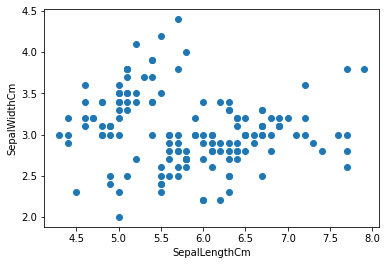

In [ ]:
ax = plt.axes()
ax.scatter(data.SepalLengthCm, data.SepalWidthCm)
ax.set(
    xlabel="SepalLengthCm",
    ylabel="SepalWidthCm",
)

[Text(0.5, 0, 'PetalLengthCm'), Text(0, 0.5, 'Frequency')]

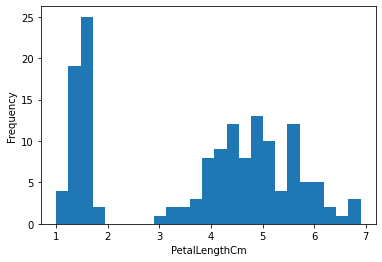

In [ ]:
ax = plt.axes()
ax.hist(data.PetalLengthCm, bins=25)
ax.set(
     xlabel="PetalLengthCm",
    ylabel="Frequency",)

(array([ 6., 28.,  7.,  7.,  1.,  1.,  0.,  0.,  0.,  7.,  3.,  5., 13.,
         8., 12.,  4.,  2., 12.,  5.,  6.,  6.,  3.,  8.,  3.,  3.]),
 array([0.1  , 0.196, 0.292, 0.388, 0.484, 0.58 , 0.676, 0.772, 0.868,
        0.964, 1.06 , 1.156, 1.252, 1.348, 1.444, 1.54 , 1.636, 1.732,
        1.828, 1.924, 2.02 , 2.116, 2.212, 2.308, 2.404, 2.5  ]),
 <BarContainer object of 25 artists>)

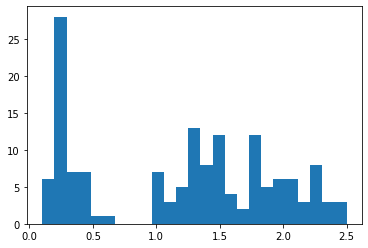

In [ ]:
ax = plt.axes()
ax.hist(data.PetalWidthCm, bins=25)

<AxesSubplot:ylabel='Frequency'>

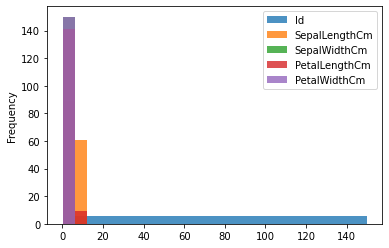

In [ ]:
data.plot.hist(bins=25, alpha=.8)

array([[<AxesSubplot:title={'center':'Id'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'PetalLengthCm'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'SepalLengthCm'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'SepalWidthCm'}, xlabel='[Species]'>,
        <AxesSubplot:>]], dtype=object)

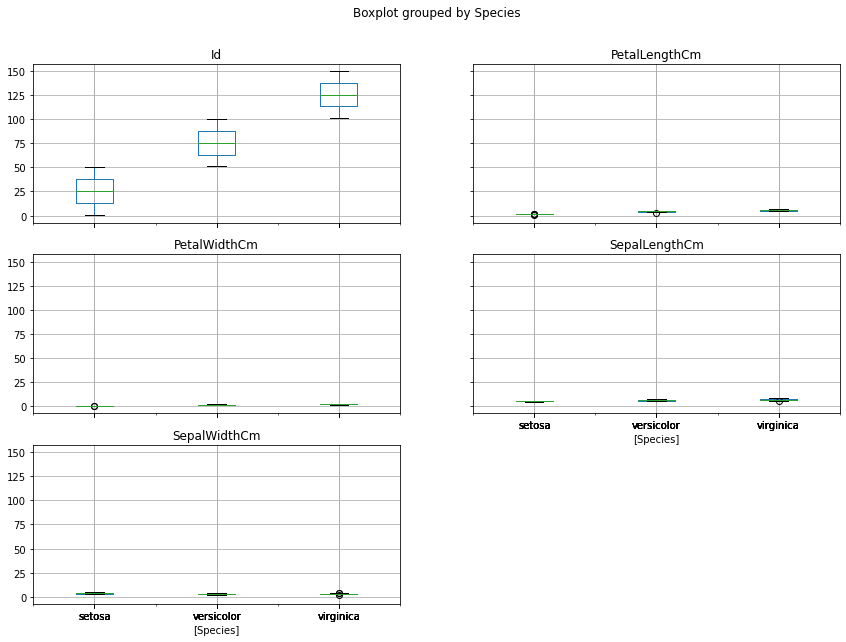

In [ ]:
data.boxplot(by='Species', figsize = (14, 10))

In [ ]:
data.set_index("Species").stack().to_frame().reset_index().rename(columns={0:"size", "level_1":"measurment"})

,Species,measurment,size
0,setosa,Id,1.0
1,setosa,SepalLengthCm,5.1
2,setosa,SepalWidthCm,3.5
3,setosa,PetalLengthCm,1.4
4,setosa,PetalWidthCm,0.2
...,...,...,...
745,virginica,Id,150.0
746,virginica,SepalLengthCm,5.9
747,virginica,SepalWidthCm,3.0
748,virginica,PetalLengthCm,5.1


In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


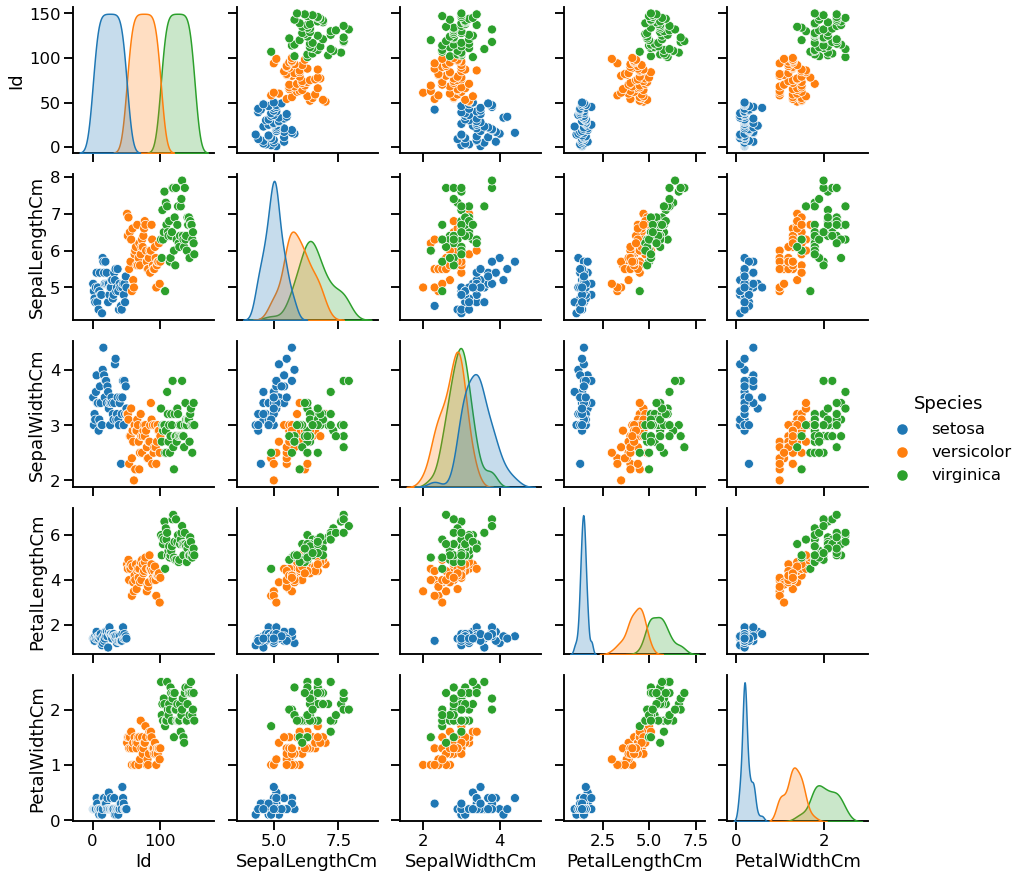

In [ ]:
sns.set_context('talk')
plot = sns.pairplot(data, hue='Species')
plot